# EXAMPLE 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
xtrain = np.array([10,12,14,15,30,35,40,65]).reshape(-1,1)
xtrain

array([[10],
       [12],
       [14],
       [15],
       [30],
       [35],
       [40],
       [65]])

In [3]:
ytrain = (xtrain > 20)
ytrain

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True]])

In [4]:
model = linear_model.LogisticRegression(C=1000)

In [5]:
model.fit(xtrain, ytrain)

/home/behzad-azadi2693/jupyter/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1000)

In [6]:
model.intercept_

array([-26.95768605])

In [7]:
model.coef_

array([[1.19837114]])

In [8]:
xtest = np.array([8,13,32,36,65])
xtest

array([ 8, 13, 32, 36, 65])

### thta transform x

In [9]:
t = model.coef_ * xtest + model.intercept_
t

array([[-17.37071694, -11.37886124,  11.39019041,  16.18367496,
         50.936438  ]])

In [10]:
ypred = 1 / (1 + np.exp(-t))
ypred = ypred.reshape(-1, 1)
ypred

array([[2.85754761e-08],
       [1.14345318e-05],
       [9.99988694e-01],
       [9.99999906e-01],
       [1.00000000e+00]])

# EXAMPLE 2

In [11]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np

In [12]:
X, y = load_iris(return_X_y = True)

In [13]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

### solver: lbfgs , newtan-cg, sag

In [14]:
clf = LogisticRegression(solver='sag', multi_class='multinomial', penalty='l2')
clf

LogisticRegression(multi_class='multinomial', solver='sag')

In [15]:
%%capture
clf.fit(X, y)

In [16]:
xtest = np.array([[5.4, 3.9, 1.7, 0.4],[5, 3, 1.6, 0.2],[5, 2, 3.5, 1],[7.4, 2.8, 6.1, 1.9]])

In [17]:
clf.predict(xtest)

array([0, 0, 1, 2])

In [18]:
clf.predict_proba(xtest)

array([[9.84708722e-01, 1.52911192e-02, 1.58352853e-07],
       [9.31472893e-01, 6.85257563e-02, 1.35035304e-06],
       [1.94728934e-02, 9.21533431e-01, 5.89936757e-02],
       [3.67131951e-05, 1.02500724e-01, 8.97462562e-01]])

In [19]:
clf.score(X, y)

0.9866666666666667

# EXAMPLE 3

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

In [21]:
iris = datasets.load_iris()
X = iris.data[:, [0,1]]
y = iris.target

In [22]:
model = LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
model.fit(X, y)

LogisticRegression(C=100000.0, multi_class='multinomial')

In [23]:
a = X[:, 0].min() - .5
b = X[:, 0].max() + .5
c = np.arange(a, b, 0.02)
c

array([3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 , 3.92, 3.94, 3.96, 3.98, 4.  ,
       4.02, 4.04, 4.06, 4.08, 4.1 , 4.12, 4.14, 4.16, 4.18, 4.2 , 4.22,
       4.24, 4.26, 4.28, 4.3 , 4.32, 4.34, 4.36, 4.38, 4.4 , 4.42, 4.44,
       4.46, 4.48, 4.5 , 4.52, 4.54, 4.56, 4.58, 4.6 , 4.62, 4.64, 4.66,
       4.68, 4.7 , 4.72, 4.74, 4.76, 4.78, 4.8 , 4.82, 4.84, 4.86, 4.88,
       4.9 , 4.92, 4.94, 4.96, 4.98, 5.  , 5.02, 5.04, 5.06, 5.08, 5.1 ,
       5.12, 5.14, 5.16, 5.18, 5.2 , 5.22, 5.24, 5.26, 5.28, 5.3 , 5.32,
       5.34, 5.36, 5.38, 5.4 , 5.42, 5.44, 5.46, 5.48, 5.5 , 5.52, 5.54,
       5.56, 5.58, 5.6 , 5.62, 5.64, 5.66, 5.68, 5.7 , 5.72, 5.74, 5.76,
       5.78, 5.8 , 5.82, 5.84, 5.86, 5.88, 5.9 , 5.92, 5.94, 5.96, 5.98,
       6.  , 6.02, 6.04, 6.06, 6.08, 6.1 , 6.12, 6.14, 6.16, 6.18, 6.2 ,
       6.22, 6.24, 6.26, 6.28, 6.3 , 6.32, 6.34, 6.36, 6.38, 6.4 , 6.42,
       6.44, 6.46, 6.48, 6.5 , 6.52, 6.54, 6.56, 6.58, 6.6 , 6.62, 6.64,
       6.66, 6.68, 6.7 , 6.72, 6.74, 6.76, 6.78, 6.

In [24]:
d = X[:, 1].min() - .5
e = X[:, 1].max() + .5
f = np.arange(d, e, 0.02)
f

array([1.5 , 1.52, 1.54, 1.56, 1.58, 1.6 , 1.62, 1.64, 1.66, 1.68, 1.7 ,
       1.72, 1.74, 1.76, 1.78, 1.8 , 1.82, 1.84, 1.86, 1.88, 1.9 , 1.92,
       1.94, 1.96, 1.98, 2.  , 2.02, 2.04, 2.06, 2.08, 2.1 , 2.12, 2.14,
       2.16, 2.18, 2.2 , 2.22, 2.24, 2.26, 2.28, 2.3 , 2.32, 2.34, 2.36,
       2.38, 2.4 , 2.42, 2.44, 2.46, 2.48, 2.5 , 2.52, 2.54, 2.56, 2.58,
       2.6 , 2.62, 2.64, 2.66, 2.68, 2.7 , 2.72, 2.74, 2.76, 2.78, 2.8 ,
       2.82, 2.84, 2.86, 2.88, 2.9 , 2.92, 2.94, 2.96, 2.98, 3.  , 3.02,
       3.04, 3.06, 3.08, 3.1 , 3.12, 3.14, 3.16, 3.18, 3.2 , 3.22, 3.24,
       3.26, 3.28, 3.3 , 3.32, 3.34, 3.36, 3.38, 3.4 , 3.42, 3.44, 3.46,
       3.48, 3.5 , 3.52, 3.54, 3.56, 3.58, 3.6 , 3.62, 3.64, 3.66, 3.68,
       3.7 , 3.72, 3.74, 3.76, 3.78, 3.8 , 3.82, 3.84, 3.86, 3.88, 3.9 ,
       3.92, 3.94, 3.96, 3.98, 4.  , 4.02, 4.04, 4.06, 4.08, 4.1 , 4.12,
       4.14, 4.16, 4.18, 4.2 , 4.22, 4.24, 4.26, 4.28, 4.3 , 4.32, 4.34,
       4.36, 4.38, 4.4 , 4.42, 4.44, 4.46, 4.48, 4.

In [25]:
c.shape

(231,)

In [26]:
f.shape

(171,)

### c_ : concatenate

In [27]:
xx, yy = np.meshgrid(c, f)
xv = xx .reshape(-1, 1)
yv = yy.reshape(-1, 1)
xtest = np.c_[xv, yv]
xtest

array([[3.8 , 1.5 ],
       [3.82, 1.5 ],
       [3.84, 1.5 ],
       ...,
       [8.36, 4.9 ],
       [8.38, 4.9 ],
       [8.4 , 4.9 ]])

In [28]:
xtest.shape

(39501, 2)

In [29]:
pred = model.predict(xtest)
pred

array([0, 0, 0, ..., 2, 2, 2])

In [30]:
pred.shape

(39501,)

(1.5, 4.900000000000003)

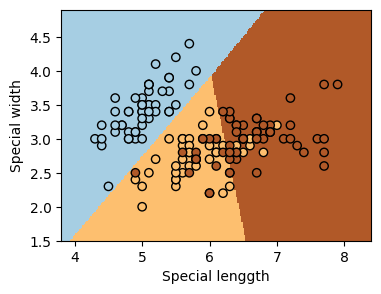

In [31]:
pred = pred.reshape(xx.shape)
plt.figure(1, figsize=(4,3))

plt.pcolormesh(xx, yy, pred, cmap=plt.cm.Paired)

plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k', cmap=plt.cm.Paired)

plt.xlabel('Special lenggth')
plt.ylabel('Special width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# EXAMPLE 4

In [32]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions

In [33]:
iris = datasets.load_iris()

In [34]:
X = iris.data[:, [0,2]]
y = iris.target
X.shape

(150, 2)

In [35]:
model = LogisticRegression(random_state=1, solver='newton-cg', multi_class='multinomial')
model.fit(X, y)

LogisticRegression(multi_class='multinomial', random_state=1,
                   solver='newton-cg')

<AxesSubplot: >

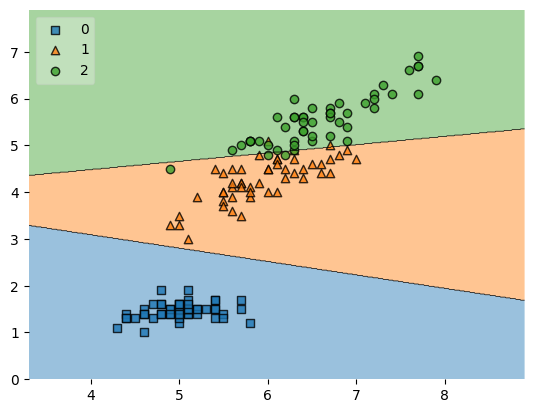

In [36]:
plot_decision_regions(X, y, clf=model, legend=2)

# EXAMPLE 5
### moon

In [37]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions

In [38]:
X, y = make_moons(n_samples=100, random_state=123)
y

array([0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1])

<AxesSubplot: >

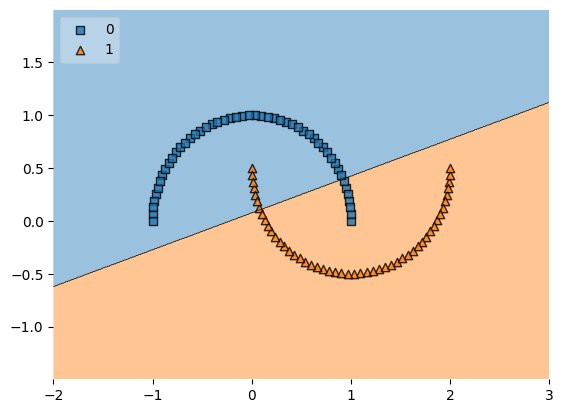

In [39]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X, y)
plot_decision_regions(X, y, clf=model, legend=2)

In [40]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.linear_model import LogisticRegression
from matplotlib import gridspec
from mlxtend.plotting import plot_decision_regions

In [41]:
X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)

<AxesSubplot: >

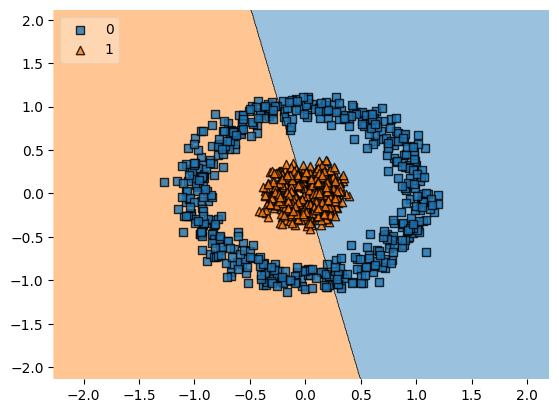

In [42]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X, y)
plot_decision_regions(X, y, clf=model, legend=2)

In [43]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:,0] > 0, X[:,1] > 0), dtype=int)

<AxesSubplot: >

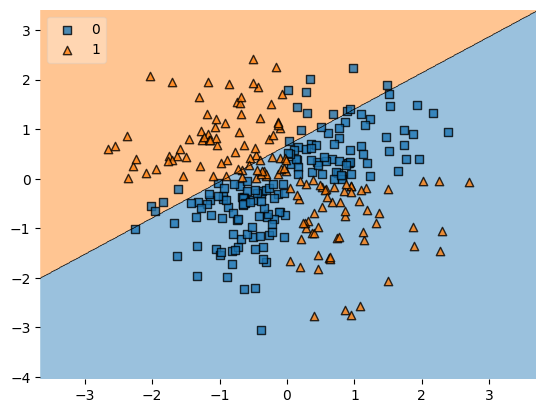

In [44]:
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X, y)
plot_decision_regions(X, y, clf=model, legend=2)